In [1]:
## Prepared by: Jacek Rzeszutek (rzeszutekjacek at gmail.com)

# Feel free to ask any questions during the presentation :)

import pandas as pd
pd.__version__

u'0.18.1'

## What is pandas?

> pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

## Why to use it?

### Data science is becoming more and more popular.

![caption](files/data_science_jobs.png)

### We need to be able to develop quickly and cheaply.

In [2]:
# Weekly mean views of Michal Pazdan on Wikipedia in Jan '15

pd.read_json('http://stats.grok.se/json/en/201501/Micha%C5%82_Pazdan') \
    .resample('1W') \
    .mean()

,daily_views,month,rank
2015-01-04,6.500000,201501.0,-1.0
2015-01-11,5.428571,201501.0,-1.0
2015-01-18,6.714286,201501.0,-1.0
2015-01-25,5.857143,201501.0,-1.0
2015-02-01,5.833333,201501.0,-1.0


### We need to write fast code.

In [3]:
some_data = list(range(1, 1000000))
some_series = pd.Series(some_data)

def standard_way(data):
    data = [x for x in data if x % 3 == 0]
    return sum(data)


def pandas_way(series):
    return series[(series % 3) == 0].sum()

In [4]:
%timeit standard_way(some_data)

1 loop, best of 3: 153 ms per loop


In [6]:
%timeit pandas_way(some_series)

10 loops, best of 3: 46.8 ms per loop


### We need to write readable code.

...see the example for mean weekly Wikipedia data

### It is hard write everything from scratch.. and it's easy to make mistakes.

http://pandas.pydata.org/pandas-docs/stable/api.html

### It has a very cool name.

![caption](files/pandas.jpg)

# Data structures

http://pandas.pydata.org/pandas-docs/stable/dsintro.html

### Series

> Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

In [7]:
strengths = pd.Series([400, 200, 300, 400, 500])
strengths

0    400
1    200
2    300
3    400
4    500
dtype: int64

In [8]:
names = pd.Series(["Batman", "Robin", "Spiderman", "Robocop", "Terminator"])
names

0        Batman
1         Robin
2     Spiderman
3       Robocop
4    Terminator
dtype: object

### DataFrame

> DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects.

In [9]:
heroes = pd.DataFrame({
        'hero': names,
        'strength': strengths
})
heroes

,hero,strength
0,Batman,400
1,Robin,200
2,Spiderman,300
3,Robocop,400
4,Terminator,500


In [10]:
heroes.shape

(5, 2)

In [11]:
other_heroes = pd.DataFrame([
    dict(hero="Hercules", strength=800),
    dict(hero="Konan")
])
other_heroes

,hero,strength
0,Hercules,800.0
1,Konan,NaN


### Index

> The axis labels are collectively referred to as the index.

There are various types of indexes.. range, datetime, categorical and more..

http://pandas.pydata.org/pandas-docs/stable/advanced.html#index-types

In [12]:
heroes.index

RangeIndex(start=0, stop=5, step=1)

# I/O

### read_*

In [14]:
# What types are supported
pd.read_sql?

In [15]:
pd.read_json('data/tiny.json')

,height,name
0,174,Jacek
1,181,Tomek
2,210,Romek


In [16]:
pd.read_csv('data/tiny.csv')

,height,name
0,174,Jacek
1,181,Tomek
2,210,Romek


In [17]:
# need to have Polish Handball team from files/wiki-page... copied to clipboard (without table headers)

handball_team = pd.read_clipboard(names=[
        "No", "Pos", "Name", "Date of birth (age)", 
        "Height", "App", "Goals", "Club"
])
handball_team

,No,Pos,Name,Date of birth (age),Height,App,Goals,Club
0,1,GK,Sławomir Szmal,2 October 1978 (aged 37),1.90 m,279,2,Poland Vive Targi Kielce
1,3,RB,Krzysztof Lijewski,7 July 1983 (aged 33),1.98 m,173,409,Poland Vive Targi Kielce
2,5,RW,Mateusz Jachlewski,27 December 1984 (aged 31),1.84 m,108,236,Poland Vive Targi Kielce
3,6,LW,Przemysław Krajewski,20 January 1987 (aged 29),1.84 m,69,132,Poland Azoty-Puławy
4,8,LB,Karol Bielecki,23 January 1982 (aged 34),2.02 m,244,891,Poland Vive Targi Kielce
5,11,LW,Adam Wiśniewski,24 October 1980 (aged 35),1.92 m,146,189,Poland Wisła Płock
6,13,P,Bartosz Jurecki,31 January 1979 (aged 37),1.93 m,227,723,Poland Chrobry Głogów
7,15,LB,Michał Jurecki,27 October 1984 (aged 31),2.02 m,189,528,Poland Vive Targi Kielce
8,16,GK,Piotr Wyszomirski,6 January 1988 (aged 28),1.93 m,104,0,Germany TBV Lemgo
9,23,P,Kamil Syprzak,23 July 1991 (aged 25),2.08 m,87,164,Spain Barcelona


### values (numpy underhood)

In [18]:
handball_team.values

array([[1, 'GK', 'S\xc5\x82awomir Szmal', '2 October 1978 (aged 37)',
        '1.90 m', 279, 2, 'Poland Vive Targi Kielce'],
       [3, 'RB', 'Krzysztof Lijewski', '7 July 1983 (aged 33)', '1.98 m',
        173, 409, 'Poland Vive Targi Kielce'],
       [5, 'RW', 'Mateusz Jachlewski', '27 December 1984 (aged 31)',
        '1.84 m', 108, 236, 'Poland Vive Targi Kielce'],
       [6, 'LW', 'Przemys\xc5\x82aw Krajewski',
        '20 January 1987 (aged 29)', '1.84 m', 69, 132,
        'Poland Azoty-Pu\xc5\x82awy'],
       [8, 'LB', 'Karol Bielecki', '23 January 1982 (aged 34)', '2.02 m',
        244, 891, 'Poland Vive Targi Kielce'],
       [11, 'LW', 'Adam Wi\xc5\x9bniewski', '24 October 1980 (aged 35)',
        '1.92 m', 146, 189, 'Poland Wis\xc5\x82a P\xc5\x82ock'],
       [13, 'P', 'Bartosz Jurecki', '31 January 1979 (aged 37)', '1.93 m',
        227, 723, 'Poland Chrobry G\xc5\x82og\xc3\xb3w'],
       [15, 'LB', 'Micha\xc5\x82 Jurecki', '27 October 1984 (aged 31)',
        '2.02 m', 189

### to_*

In [19]:
handball_team.to_dict('records')

[{'App': 279,
  'Club': 'Poland Vive Targi Kielce',
  'Date of birth (age)': '2 October 1978 (aged 37)',
  'Goals': 2,
  'Height': '1.90 m',
  'Name': 'S\xc5\x82awomir Szmal',
  'No': 1,
  'Pos': 'GK'},
 {'App': 173,
  'Club': 'Poland Vive Targi Kielce',
  'Date of birth (age)': '7 July 1983 (aged 33)',
  'Goals': 409,
  'Height': '1.98 m',
  'Name': 'Krzysztof Lijewski',
  'No': 3,
  'Pos': 'RB'},
 {'App': 108,
  'Club': 'Poland Vive Targi Kielce',
  'Date of birth (age)': '27 December 1984 (aged 31)',
  'Goals': 236,
  'Height': '1.84 m',
  'Name': 'Mateusz Jachlewski',
  'No': 5,
  'Pos': 'RW'},
 {'App': 69,
  'Club': 'Poland Azoty-Pu\xc5\x82awy',
  'Date of birth (age)': '20 January 1987 (aged 29)',
  'Goals': 132,
  'Height': '1.84 m',
  'Name': 'Przemys\xc5\x82aw Krajewski',
  'No': 6,
  'Pos': 'LW'},
 {'App': 244,
  'Club': 'Poland Vive Targi Kielce',
  'Date of birth (age)': '23 January 1982 (aged 34)',
  'Goals': 891,
  'Height': '2.02 m',
  'Name': 'Karol Bielecki',
  'No': 8

In [20]:
handball_team.to_json()

'{"No":{"0":1,"1":3,"2":5,"3":6,"4":8,"5":11,"6":13,"7":15,"8":16,"9":23,"10":26,"11":28,"12":35,"13":45},"Pos":{"0":"GK","1":"RB","2":"RW","3":"LW","4":"LB","5":"LW","6":"P","7":"LB","8":"GK","9":"P","10":"RW","11":"CB","12":"P","13":"RB"},"Name":{"0":"S\\u0142awomir Szmal","1":"Krzysztof Lijewski","2":"Mateusz Jachlewski","3":"Przemys\\u0142aw Krajewski","4":"Karol Bielecki","5":"Adam Wi\\u015bniewski","6":"Bartosz Jurecki","7":"Micha\\u0142 Jurecki","8":"Piotr Wyszomirski","9":"Kamil Syprzak","10":"Micha\\u0142 Daszek","11":"\\u0141ukasz Gierak","12":"Mateusz Kus","13":"Micha\\u0142 Szyba"},"Date of birth (age)":{"0":"2 October 1978 (aged 37)","1":"7 July 1983 (aged 33)","2":"27 December 1984 (aged 31)","3":"20 January 1987 (aged 29)","4":"23 January 1982 (aged 34)","5":"24 October 1980 (aged 35)","6":"31 January 1979 (aged 37)","7":"27 October 1984 (aged 31)","8":"6 January 1988 (aged 28)","9":"23 July 1991 (aged 25)","10":"27 June 1992 (aged 24)","11":"22 June 1988 (aged 28)","12"

In [21]:
handball_team.to_csv('data/polish_handball.csv')

In [22]:
handball_team.to_sql?

## Series / DataFrame viewing and operations

### Overview

In [23]:
handball_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
No                     14 non-null int64
Pos                    14 non-null object
Name                   14 non-null object
Date of birth (age)    14 non-null object
Height                 14 non-null object
App                    14 non-null int64
Goals                  14 non-null int64
Club                   14 non-null object
dtypes: int64(3), object(5)
memory usage: 968.0+ bytes


In [24]:
handball_team.dtypes

No                      int64
Pos                    object
Name                   object
Date of birth (age)    object
Height                 object
App                     int64
Goals                   int64
Club                   object
dtype: object

In [25]:
handball_team.describe()

,No,App,Goals
count,14.000000,14.0000,14.000000
mean,16.785714,125.0000,248.285714
std,13.009929,86.9916,284.773980
min,1.000000,5.0000,0.000000
25%,6.500000,60.0000,25.000000
50%,14.000000,106.0000,148.000000
75%,25.250000,185.0000,365.750000
max,45.000000,279.0000,891.000000


In [26]:
handball_team.head()

,No,Pos,Name,Date of birth (age),Height,App,Goals,Club
0,1,GK,Sławomir Szmal,2 October 1978 (aged 37),1.90 m,279,2,Poland Vive Targi Kielce
1,3,RB,Krzysztof Lijewski,7 July 1983 (aged 33),1.98 m,173,409,Poland Vive Targi Kielce
2,5,RW,Mateusz Jachlewski,27 December 1984 (aged 31),1.84 m,108,236,Poland Vive Targi Kielce
3,6,LW,Przemysław Krajewski,20 January 1987 (aged 29),1.84 m,69,132,Poland Azoty-Puławy
4,8,LB,Karol Bielecki,23 January 1982 (aged 34),2.02 m,244,891,Poland Vive Targi Kielce


In [27]:
# selecting Series
handball_team['App']

0     279
1     173
2     108
3      69
4     244
5     146
6     227
7     189
8     104
9      87
10     56
11      6
12      5
13     57
Name: App, dtype: int64

In [28]:
# selecting DataFrame
handball_team[ ['Name', 'App'] ]

,Name,App
0,Sławomir Szmal,279
1,Krzysztof Lijewski,173
2,Mateusz Jachlewski,108
3,Przemysław Krajewski,69
4,Karol Bielecki,244
5,Adam Wiśniewski,146
6,Bartosz Jurecki,227
7,Michał Jurecki,189
8,Piotr Wyszomirski,104
9,Kamil Syprzak,87


In [29]:
# selecting rows
handball_team.loc[6:8]

,No,Pos,Name,Date of birth (age),Height,App,Goals,Club
6,13,P,Bartosz Jurecki,31 January 1979 (aged 37),1.93 m,227,723,Poland Chrobry Głogów
7,15,LB,Michał Jurecki,27 October 1984 (aged 31),2.02 m,189,528,Poland Vive Targi Kielce
8,16,GK,Piotr Wyszomirski,6 January 1988 (aged 28),1.93 m,104,0,Germany TBV Lemgo


### Filtering

Boolean indexing

In [30]:
handball_team['App'] > 200

0      True
1     False
2     False
3     False
4      True
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
Name: App, dtype: bool

In [31]:
handball_team[ handball_team['App'] > 100 ]

,No,Pos,Name,Date of birth (age),Height,App,Goals,Club
0,1,GK,Sławomir Szmal,2 October 1978 (aged 37),1.90 m,279,2,Poland Vive Targi Kielce
1,3,RB,Krzysztof Lijewski,7 July 1983 (aged 33),1.98 m,173,409,Poland Vive Targi Kielce
2,5,RW,Mateusz Jachlewski,27 December 1984 (aged 31),1.84 m,108,236,Poland Vive Targi Kielce
4,8,LB,Karol Bielecki,23 January 1982 (aged 34),2.02 m,244,891,Poland Vive Targi Kielce
5,11,LW,Adam Wiśniewski,24 October 1980 (aged 35),1.92 m,146,189,Poland Wisła Płock
6,13,P,Bartosz Jurecki,31 January 1979 (aged 37),1.93 m,227,723,Poland Chrobry Głogów
7,15,LB,Michał Jurecki,27 October 1984 (aged 31),2.02 m,189,528,Poland Vive Targi Kielce
8,16,GK,Piotr Wyszomirski,6 January 1988 (aged 28),1.93 m,104,0,Germany TBV Lemgo


In [32]:
handball_team[
    (handball_team['App'] > 100) & 
    (handball_team['Goals'] > 200)
]

,No,Pos,Name,Date of birth (age),Height,App,Goals,Club
1,3,RB,Krzysztof Lijewski,7 July 1983 (aged 33),1.98 m,173,409,Poland Vive Targi Kielce
2,5,RW,Mateusz Jachlewski,27 December 1984 (aged 31),1.84 m,108,236,Poland Vive Targi Kielce
4,8,LB,Karol Bielecki,23 January 1982 (aged 34),2.02 m,244,891,Poland Vive Targi Kielce
6,13,P,Bartosz Jurecki,31 January 1979 (aged 37),1.93 m,227,723,Poland Chrobry Głogów
7,15,LB,Michał Jurecki,27 October 1984 (aged 31),2.02 m,189,528,Poland Vive Targi Kielce


### Vectorized operations

In [33]:
handball_team['Goals per app'] = 1.0
handball_team.head()

,No,Pos,Name,Date of birth (age),Height,App,Goals,Club,Goals per app
0,1,GK,Sławomir Szmal,2 October 1978 (aged 37),1.90 m,279,2,Poland Vive Targi Kielce,1.0
1,3,RB,Krzysztof Lijewski,7 July 1983 (aged 33),1.98 m,173,409,Poland Vive Targi Kielce,1.0
2,5,RW,Mateusz Jachlewski,27 December 1984 (aged 31),1.84 m,108,236,Poland Vive Targi Kielce,1.0
3,6,LW,Przemysław Krajewski,20 January 1987 (aged 29),1.84 m,69,132,Poland Azoty-Puławy,1.0
4,8,LB,Karol Bielecki,23 January 1982 (aged 34),2.02 m,244,891,Poland Vive Targi Kielce,1.0


In [34]:
handball_team['Goals'] / handball_team['App']

0     0.007168
1     2.364162
2     2.185185
3     1.913043
4     3.651639
5     1.294521
6     3.185022
7     2.793651
8     0.000000
9     1.885057
10    1.964286
11    1.000000
12    0.800000
13    1.438596
dtype: float64

In [35]:
handball_team['Goals per app'] = handball_team['Goals'] / handball_team['App']
handball_team.head()

,No,Pos,Name,Date of birth (age),Height,App,Goals,Club,Goals per app
0,1,GK,Sławomir Szmal,2 October 1978 (aged 37),1.90 m,279,2,Poland Vive Targi Kielce,0.007168
1,3,RB,Krzysztof Lijewski,7 July 1983 (aged 33),1.98 m,173,409,Poland Vive Targi Kielce,2.364162
2,5,RW,Mateusz Jachlewski,27 December 1984 (aged 31),1.84 m,108,236,Poland Vive Targi Kielce,2.185185
3,6,LW,Przemysław Krajewski,20 January 1987 (aged 29),1.84 m,69,132,Poland Azoty-Puławy,1.913043
4,8,LB,Karol Bielecki,23 January 1982 (aged 34),2.02 m,244,891,Poland Vive Targi Kielce,3.651639


### Sorting

In [36]:
handball_team.sort_values(['App'], ascending=[False]).head()

,No,Pos,Name,Date of birth (age),Height,App,Goals,Club,Goals per app
0,1,GK,Sławomir Szmal,2 October 1978 (aged 37),1.90 m,279,2,Poland Vive Targi Kielce,0.007168
4,8,LB,Karol Bielecki,23 January 1982 (aged 34),2.02 m,244,891,Poland Vive Targi Kielce,3.651639
6,13,P,Bartosz Jurecki,31 January 1979 (aged 37),1.93 m,227,723,Poland Chrobry Głogów,3.185022
7,15,LB,Michał Jurecki,27 October 1984 (aged 31),2.02 m,189,528,Poland Vive Targi Kielce,2.793651
1,3,RB,Krzysztof Lijewski,7 July 1983 (aged 33),1.98 m,173,409,Poland Vive Targi Kielce,2.364162


### Aggregation methods

In [37]:
handball_team.sum()

No                                                                   235
Pos                                            GKRBRWLWLBLWPLBGKPRWCBPRB
Name                   Sławomir SzmalKrzysztof LijewskiMateusz Jachle...
Date of birth (age)    2 October 1978 (aged 37)7 July 1983 (aged 33)2...
Height                 1.90 m1.98 m1.84 m1.84 m2.02 m1.92 m1.93 m2.02...
App                                                                 1750
Goals                                                               3476
Club                   Poland Vive Targi KielcePoland Vive Targi Kiel...
Goals per app                                                    24.4823
dtype: object

In [38]:
handball_team.mean()

No                16.785714
App              125.000000
Goals            248.285714
Goals per app      1.748738
dtype: float64

### Groupby

In [39]:
handball_team.groupby('Club').size()

Club
Germany TBV Lemgo           1
Poland Azoty-Puławy         1
Poland Chrobry Głogów       1
Poland Pogoń Szczecin       1
Poland Vive Targi Kielce    6
Poland Wisła Płock          2
Slovenia Gorenje Velenje    1
Spain Barcelona             1
dtype: int64

In [40]:
handball_team.groupby('Pos').mean()

,No,App,Goals,Goals per app
Pos,,,,
CB,28.000000,6.000000,6.0,1.000000
GK,8.500000,191.500000,1.0,0.003584
LB,11.500000,216.500000,709.5,3.222645
LW,8.500000,107.500000,160.5,1.603782
P,23.666667,106.333333,297.0,1.956693
RB,24.000000,115.000000,245.5,1.901379
RW,15.500000,82.000000,173.0,2.074735


In [41]:
handball_team.groupby(['Pos', 'Club']).size()

Pos  Club                    
CB   Poland Pogoń Szczecin       1
GK   Germany TBV Lemgo           1
     Poland Vive Targi Kielce    1
LB   Poland Vive Targi Kielce    2
LW   Poland Azoty-Puławy         1
     Poland Wisła Płock          1
P    Poland Chrobry Głogów       1
     Poland Vive Targi Kielce    1
     Spain Barcelona             1
RB   Poland Vive Targi Kielce    1
     Slovenia Gorenje Velenje    1
RW   Poland Vive Targi Kielce    1
     Poland Wisła Płock          1
dtype: int64

### Duplicates

In [42]:
handball_team['Pos'].unique()

array(['GK', 'RB', 'RW', 'LW', 'LB', 'P', 'CB'], dtype=object)

In [43]:
handball_team['Pos'].duplicated()

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7      True
8      True
9      True
10     True
11    False
12     True
13     True
Name: Pos, dtype: bool

In [44]:
handball_team.head(6)

,No,Pos,Name,Date of birth (age),Height,App,Goals,Club,Goals per app
0,1,GK,Sławomir Szmal,2 October 1978 (aged 37),1.90 m,279,2,Poland Vive Targi Kielce,0.007168
1,3,RB,Krzysztof Lijewski,7 July 1983 (aged 33),1.98 m,173,409,Poland Vive Targi Kielce,2.364162
2,5,RW,Mateusz Jachlewski,27 December 1984 (aged 31),1.84 m,108,236,Poland Vive Targi Kielce,2.185185
3,6,LW,Przemysław Krajewski,20 January 1987 (aged 29),1.84 m,69,132,Poland Azoty-Puławy,1.913043
4,8,LB,Karol Bielecki,23 January 1982 (aged 34),2.02 m,244,891,Poland Vive Targi Kielce,3.651639
5,11,LW,Adam Wiśniewski,24 October 1980 (aged 35),1.92 m,146,189,Poland Wisła Płock,1.294521


In [45]:
# It's not inplace, functional approach
handball_team.drop_duplicates('Pos')

,No,Pos,Name,Date of birth (age),Height,App,Goals,Club,Goals per app
0,1,GK,Sławomir Szmal,2 October 1978 (aged 37),1.90 m,279,2,Poland Vive Targi Kielce,0.007168
1,3,RB,Krzysztof Lijewski,7 July 1983 (aged 33),1.98 m,173,409,Poland Vive Targi Kielce,2.364162
2,5,RW,Mateusz Jachlewski,27 December 1984 (aged 31),1.84 m,108,236,Poland Vive Targi Kielce,2.185185
3,6,LW,Przemysław Krajewski,20 January 1987 (aged 29),1.84 m,69,132,Poland Azoty-Puławy,1.913043
4,8,LB,Karol Bielecki,23 January 1982 (aged 34),2.02 m,244,891,Poland Vive Targi Kielce,3.651639
6,13,P,Bartosz Jurecki,31 January 1979 (aged 37),1.93 m,227,723,Poland Chrobry Głogów,3.185022
11,28,CB,Łukasz Gierak,22 June 1988 (aged 28),1.92 m,6,6,Poland Pogoń Szczecin,1.000000


In [46]:
handball_team.shape
# handball_team = handball_team.drop_duplicates('Pos')

(14, 9)

### Map (and apply)

http://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas

In [47]:
handball_team['Height'].head(2)

0    1.90 m
1    1.98 m
Name: Height, dtype: object

In [48]:
handball_team['Height'].map(
    lambda height: float(height.split(' ')[0])
)

0     1.90
1     1.98
2     1.84
3     1.84
4     2.02
5     1.92
6     1.93
7     2.02
8     1.93
9     2.08
10    1.80
11    1.92
12    2.00
13    1.96
Name: Height, dtype: float64

In [49]:
handball_team.rename(
    columns={ "Height": "Raw Height" },
    inplace=True
)
handball_team.head()

,No,Pos,Name,Date of birth (age),Raw Height,App,Goals,Club,Goals per app
0,1,GK,Sławomir Szmal,2 October 1978 (aged 37),1.90 m,279,2,Poland Vive Targi Kielce,0.007168
1,3,RB,Krzysztof Lijewski,7 July 1983 (aged 33),1.98 m,173,409,Poland Vive Targi Kielce,2.364162
2,5,RW,Mateusz Jachlewski,27 December 1984 (aged 31),1.84 m,108,236,Poland Vive Targi Kielce,2.185185
3,6,LW,Przemysław Krajewski,20 January 1987 (aged 29),1.84 m,69,132,Poland Azoty-Puławy,1.913043
4,8,LB,Karol Bielecki,23 January 1982 (aged 34),2.02 m,244,891,Poland Vive Targi Kielce,3.651639


In [50]:
def parse_height(height):
    return float(height.split(' ')[0])

assert parse_height("1.90 m") == 1.9

handball_team['Height'] = handball_team['Raw Height'].map(parse_height)
handball_team.head()

,No,Pos,Name,Date of birth (age),Raw Height,App,Goals,Club,Goals per app,Height
0,1,GK,Sławomir Szmal,2 October 1978 (aged 37),1.90 m,279,2,Poland Vive Targi Kielce,0.007168,1.90
1,3,RB,Krzysztof Lijewski,7 July 1983 (aged 33),1.98 m,173,409,Poland Vive Targi Kielce,2.364162,1.98
2,5,RW,Mateusz Jachlewski,27 December 1984 (aged 31),1.84 m,108,236,Poland Vive Targi Kielce,2.185185,1.84
3,6,LW,Przemysław Krajewski,20 January 1987 (aged 29),1.84 m,69,132,Poland Azoty-Puławy,1.913043,1.84
4,8,LB,Karol Bielecki,23 January 1982 (aged 34),2.02 m,244,891,Poland Vive Targi Kielce,3.651639,2.02


In [51]:
# Are you taller than the shortest among the team?
handball_team['Height'].min()

1.8

In [52]:
# Is height correlated with scoring goals?
handball_team.corr()

,No,App,Goals,Goals per app,Height
No,1.000000,-0.696672,-0.373522,-0.215461,0.200705
App,-0.696672,1.000000,0.638041,0.338935,0.164735
Goals,-0.373522,0.638041,1.000000,0.892892,0.331158
Goals per app,-0.215461,0.338935,0.892892,1.000000,0.201400
Height,0.200705,0.164735,0.331158,0.201400,1.000000


In [53]:
handball_team.dtypes

No                       int64
Pos                     object
Name                    object
Date of birth (age)     object
Raw Height              object
App                      int64
Goals                    int64
Club                    object
Goals per app          float64
Height                 float64
dtype: object

In [54]:
del handball_team['Raw Height']
# ..or
# handball_team[[x for x in handball_team.columns if x not in ['Raw Height']]]
handball_team.head()

,No,Pos,Name,Date of birth (age),App,Goals,Club,Goals per app,Height
0,1,GK,Sławomir Szmal,2 October 1978 (aged 37),279,2,Poland Vive Targi Kielce,0.007168,1.90
1,3,RB,Krzysztof Lijewski,7 July 1983 (aged 33),173,409,Poland Vive Targi Kielce,2.364162,1.98
2,5,RW,Mateusz Jachlewski,27 December 1984 (aged 31),108,236,Poland Vive Targi Kielce,2.185185,1.84
3,6,LW,Przemysław Krajewski,20 January 1987 (aged 29),69,132,Poland Azoty-Puławy,1.913043,1.84
4,8,LB,Karol Bielecki,23 January 1982 (aged 34),244,891,Poland Vive Targi Kielce,3.651639,2.02


### Data visualization

In [55]:
%matplotlib inline

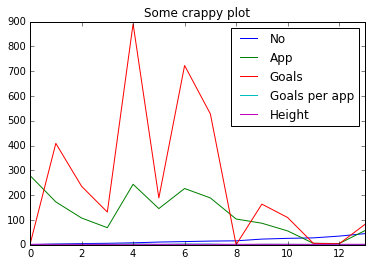

In [56]:
handball_team.plot(title='Some crappy plot')

In [57]:
plot_friendly_team = handball_team.set_index('Name')
del plot_friendly_team['No']
plot_friendly_team.head()

,Pos,Date of birth (age),App,Goals,Club,Goals per app,Height
Name,,,,,,,
Sławomir Szmal,GK,2 October 1978 (aged 37),279,2,Poland Vive Targi Kielce,0.007168,1.90
Krzysztof Lijewski,RB,7 July 1983 (aged 33),173,409,Poland Vive Targi Kielce,2.364162,1.98
Mateusz Jachlewski,RW,27 December 1984 (aged 31),108,236,Poland Vive Targi Kielce,2.185185,1.84
Przemysław Krajewski,LW,20 January 1987 (aged 29),69,132,Poland Azoty-Puławy,1.913043,1.84
Karol Bielecki,LB,23 January 1982 (aged 34),244,891,Poland Vive Targi Kielce,3.651639,2.02


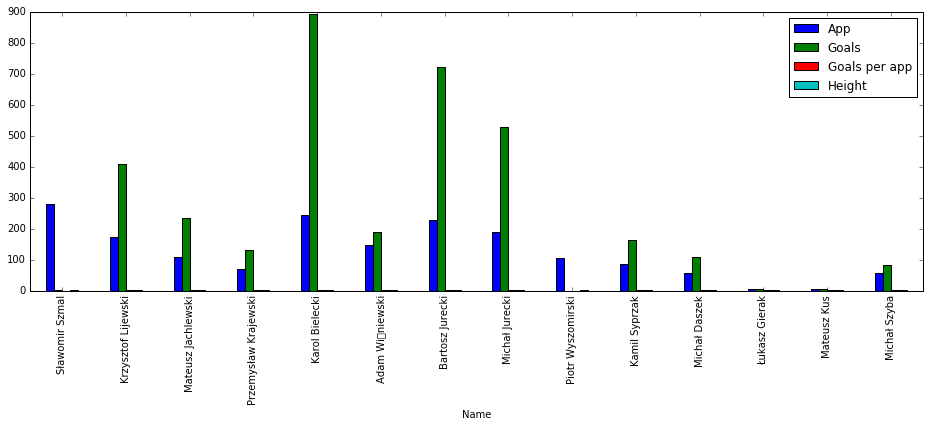

In [58]:
plot_friendly_team.plot(kind='bar', figsize=(16, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x114a01850>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x114ba1290>], dtype=object)

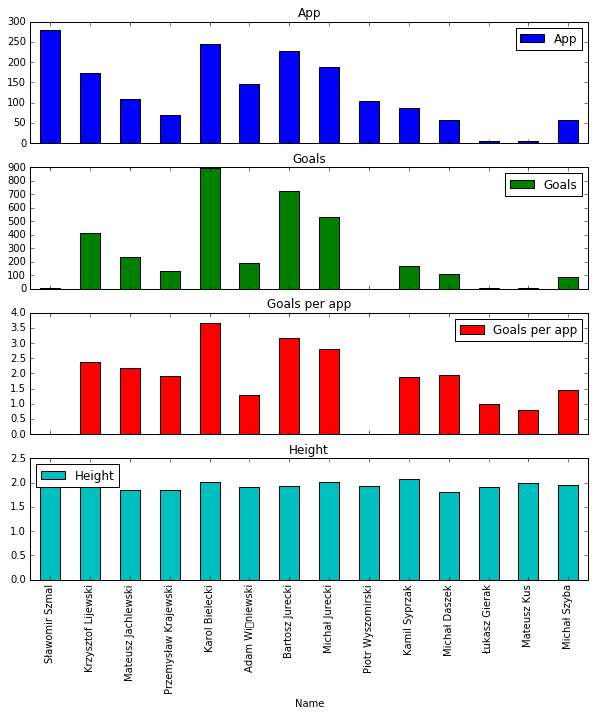

In [59]:
plot_friendly_team.plot(kind='bar', subplots=True, figsize=(10, 10))

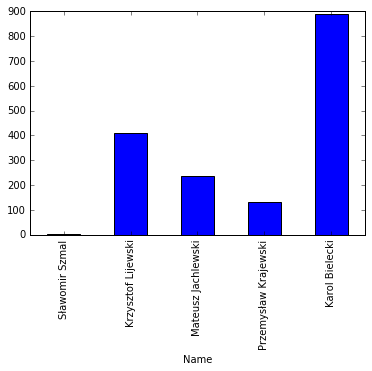

In [60]:
# goals of first 5 players 
plot_friendly_team.head()['Goals'].plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114cb6250>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1151da190>]], dtype=object)

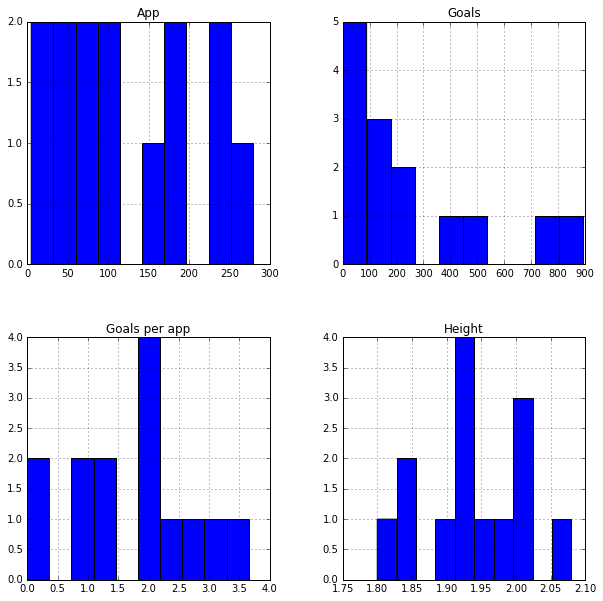

In [61]:
plot_friendly_team.hist(figsize=(10, 10))

###  Mutating row(s)

In [62]:
heroes.loc[2, 'strength'] = 3000
heroes

,hero,strength
0,Batman,400
1,Robin,200
2,Spiderman,3000
3,Robocop,400
4,Terminator,500


In [63]:
indexed_heroes = heroes.set_index('hero')

indexed_heroes.loc["Robin", "strength"] = 4000
indexed_heroes

,strength
hero,
Batman,400
Robin,4000
Spiderman,3000
Robocop,400
Terminator,500


In [64]:
heroes.loc[0:3, "strength"] = 30
heroes

,hero,strength
0,Batman,30
1,Robin,30
2,Spiderman,30
3,Robocop,30
4,Terminator,500


### Looping

In [65]:
for idx, row in heroes.iterrows():
    print 'Row:\n', row, '\n'

Row:
hero        Batman
strength        30
Name: 0, dtype: object 

Row:
hero        Robin
strength       30
Name: 1, dtype: object 

Row:
hero        Spiderman
strength           30
Name: 2, dtype: object 

Row:
hero        Robocop
strength         30
Name: 3, dtype: object 

Row:
hero        Terminator
strength           500
Name: 4, dtype: object 



In [66]:
for idx, row in heroes.iterrows():
    if 'o' in row['hero']:
        heroes.loc[idx, 'strength'] = 5000

heroes

,hero,strength
0,Batman,30
1,Robin,5000
2,Spiderman,30
3,Robocop,5000
4,Terminator,5000


# Wildlife

### json-csv converter

In [67]:
def convert(input_path, output_path):
    pd.read_json(input_path) \
        .to_csv(
            output_path,
            index=False
        )
    return True

In [68]:
convert('data/tiny.json', 'data/converted-tiny.csv')

True

### missing values

In [69]:
!cat data/tiny_with_missing.csv

height,name,weight
174,Jacek,75
181,Tomek,
210,Romek,91
,Janek,92
176,Darek,73
,Czarek,


In [70]:
with_missing = pd.read_csv('data/tiny_with_missing.csv')
with_missing

,height,name,weight
0,174.0,Jacek,75.0
1,181.0,Tomek,NaN
2,210.0,Romek,91.0
3,NaN,Janek,92.0
4,176.0,Darek,73.0
5,NaN,Czarek,NaN


In [71]:
with_missing.dropna()

,height,name,weight
0,174.0,Jacek,75.0
2,210.0,Romek,91.0
4,176.0,Darek,73.0


In [72]:
with_missing.fillna(0)

,height,name,weight
0,174.0,Jacek,75.0
1,181.0,Tomek,0.0
2,210.0,Romek,91.0
3,0.0,Janek,92.0
4,176.0,Darek,73.0
5,0.0,Czarek,0.0


In [73]:
with_missing.fillna({
    'height': 10,
    'weight': 20
})

,height,name,weight
0,174.0,Jacek,75.0
1,181.0,Tomek,20.0
2,210.0,Romek,91.0
3,10.0,Janek,92.0
4,176.0,Darek,73.0
5,10.0,Czarek,20.0


In [74]:
with_missing.mean()

height    185.25
weight     82.75
dtype: float64

In [75]:
with_missing.fillna(
    with_missing.mean()
)

,height,name,weight
0,174.00,Jacek,75.00
1,181.00,Tomek,82.75
2,210.00,Romek,91.00
3,185.25,Janek,92.00
4,176.00,Darek,73.00
5,185.25,Czarek,82.75


### Machine Learning integration

In [76]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X=[
        [1],
        [2]
    ],
    y=[
        10,
        20
    ])

/Users/jacekrzeszutek/.virtualenvs/first-steps-with-pandas-2/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
clf.predict([[3], [100], [1000]])

array([   30.,  1000., 10000.])

In [78]:
# Let's say we want to run pizzeria..
# (example inspired by https://www.amazon.com/Mastering-Machine-Learning-scikit-learn-Hackeling/dp/1783988363)

training_dataset = pd.read_csv('data/pizzeria_prices.csv')
training_dataset

,diameter,pepperoni_slices,price
0,20,0,15
1,30,0,20
2,20,5,18
3,20,10,20


In [79]:
FEATURES = ['diameter', 'pepperoni_slices']
TARGET = 'price'

training_dataset[FEATURES].values

array([[20,  0],
       [30,  0],
       [20,  5],
       [20, 10]])

In [80]:
clf = LinearRegression()
clf.fit(
    training_dataset[FEATURES],
    training_dataset[TARGET]
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
# make a quiz!
clf.predict([[35, 10]])

array([ 27.41666667])

In [82]:
hardcore_pizzas = pd.read_csv('data/hardcore_pizzas.csv')
hardcore_pizzas

,diameter,pepperoni_slices
0,40,30
1,100,100
2,1000,3000


In [83]:
hardcore_pizzas['price'] = clf.predict(hardcore_pizzas[FEATURES].values)
hardcore_pizzas

,diameter,pepperoni_slices,price
0,40,30,39.833333
1,100,100,103.833333
2,1000,3000,1988.833333


In [84]:
handball_team.head(3)

,No,Pos,Name,Date of birth (age),App,Goals,Club,Goals per app,Height
0,1,GK,Sławomir Szmal,2 October 1978 (aged 37),279,2,Poland Vive Targi Kielce,0.007168,1.90
1,3,RB,Krzysztof Lijewski,7 July 1983 (aged 33),173,409,Poland Vive Targi Kielce,2.364162,1.98
2,5,RW,Mateusz Jachlewski,27 December 1984 (aged 31),108,236,Poland Vive Targi Kielce,2.185185,1.84


In [85]:
pd.get_dummies(handball_team['Pos'])

,CB,GK,LB,LW,P,RB,RW
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Merge, append - combining DataFrames

In [86]:
# merge

users = pd.DataFrame([
    ('Jacek', 174),
    ('Tomek', 181),
    ('Romek', 210)
], columns=['name', 'height'])

users

,name,height
0,Jacek,174
1,Tomek,181
2,Romek,210


In [87]:
posts = pd.DataFrame([
    ('Jacek', 31),
    ('Tomek', 7),
], columns=['name', 'num_posts'])

posts

,name,num_posts
0,Jacek,31
1,Tomek,7


In [88]:
pd.merge(
    users,
    posts,
    # how='outer',
    on=['name'],
)

,name,height,num_posts
0,Jacek,174,31
1,Tomek,181,7


In [89]:
# append

heroes = pd.DataFrame()

new_heroes = [dict(hero=h, strength=100) for h in ['Batman', 'Robin']]

# DataFrame or Series/dict-like object, or list of these
heroes = heroes.append(new_heroes)

heroes

,hero,strength
0,Batman,100
1,Robin,100


In [90]:
even_more_heroes = [dict(hero='Spiderman', strength=200)]
heroes = heroes.append(even_more_heroes)
heroes

,hero,strength
0,Batman,100
1,Robin,100
0,Spiderman,200


In [91]:
heroes = heroes.reset_index()
heroes

,index,hero,strength
0,0,Batman,100
1,1,Robin,100
2,0,Spiderman,200


### Datetime operations

In [92]:
wig20 = pd.read_csv('data/wig20.csv', parse_dates=['Data'], index_col='Data')
wig20.head()

,wig20
Data,
2015-01-02,2309.39
2015-01-05,2264.75
2015-01-07,2307.46
2015-01-08,2361.48
2015-01-09,2337.21


In [93]:
pmi = pd.read_csv('data/pmi.csv', parse_dates=['Data'], index_col='Data')
pmi.head()

,pmi
Data,
2015-01-30,55.2
2015-02-27,55.1
2015-03-31,54.8
2015-04-30,54.0
2015-05-29,52.4


In [94]:
wig20.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
               '2015-01-15', '2015-01-16',
               ...
               '2016-08-12', '2016-08-16', '2016-08-17', '2016-08-18',
               '2016-08-19', '2016-08-22', '2016-08-23', '2016-08-24',
               '2016-08-25', '2016-08-26'],
              dtype='datetime64[ns]', name=u'Data', length=415, freq=None)

In [95]:
wig20["2015-10-01":"2015-10-10"]

,wig20
Data,
2015-10-01,2049.93
2015-10-02,2036.32
2015-10-05,2088.27
2015-10-06,2102.87
2015-10-07,2110.39
2015-10-08,2126.48
2015-10-09,2143.28


In [96]:
wig20["2016-08":]

,wig20
Data,
2016-08-01,1762.12
2016-08-02,1803.63
2016-08-03,1790.09
2016-08-04,1820.24
2016-08-05,1825.45
2016-08-08,1837.05
2016-08-09,1847.15
2016-08-10,1852.54
2016-08-11,1864.70


In [97]:
pmi[:"2015-03"]

,pmi
Data,
2015-01-30,55.2
2015-02-27,55.1
2015-03-31,54.8


In [98]:
pmi.resample('1W').ffill().head(10)

,pmi
Data,
2015-02-01,55.2
2015-02-08,55.2
2015-02-15,55.2
2015-02-22,55.2
2015-03-01,55.1
2015-03-08,55.1
2015-03-15,55.1
2015-03-22,55.1
2015-03-29,55.1


In [99]:
daily = pd.merge(
    wig20.resample('1D').ffill(),
    pmi.resample('1D').ffill(),
    left_index=True,
    right_index=True
)

daily.tail()

,wig20,pmi
Data,,
2016-07-25,1814.75,51.8
2016-07-26,1803.96,51.8
2016-07-27,1797.63,51.8
2016-07-28,1788.51,51.8
2016-07-29,1759.74,50.3


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1173ee150>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1174a4890>], dtype=object)

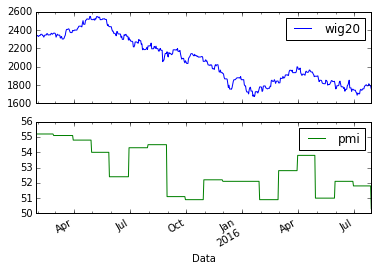

In [100]:
daily.plot(subplots=True)

In [101]:
wig20['diff'] = wig20.diff()
wig20.tail()

,wig20,diff
Data,,
2016-08-22,1800.34,0.17
2016-08-23,1790.60,-9.74
2016-08-24,1786.32,-4.28
2016-08-25,1781.68,-4.64
2016-08-26,1775.90,-5.78


In [102]:
wig20['daily_change'] = wig20['wig20'].pct_change()
wig20.tail()

,wig20,diff,daily_change
Data,,,
2016-08-22,1800.34,0.17,0.000094
2016-08-23,1790.60,-9.74,-0.005410
2016-08-24,1786.32,-4.28,-0.002390
2016-08-25,1781.68,-4.64,-0.002598
2016-08-26,1775.90,-5.78,-0.003244


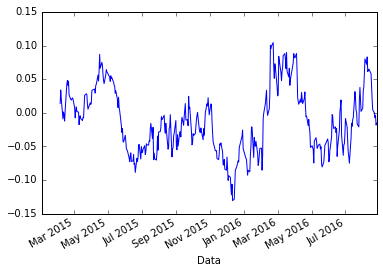

In [103]:
wig20['monthly_change'] = wig20['wig20'].pct_change(periods=22)
wig20['monthly_change'].plot()

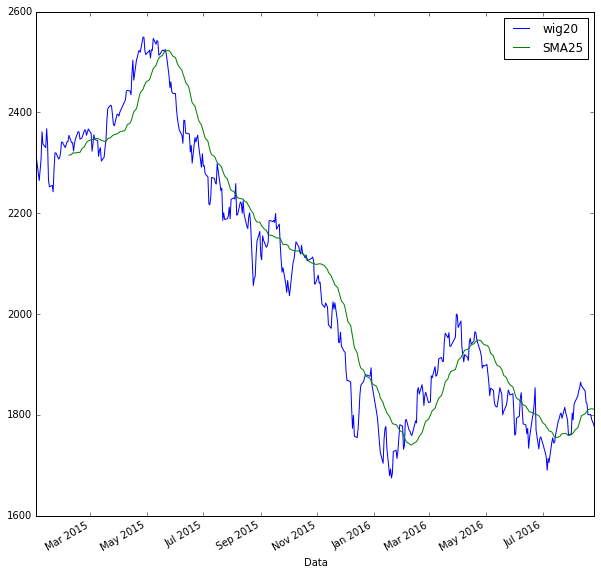

In [104]:
wig20['SMA25'] = wig20['wig20'].rolling(window=25).mean()
wig20[['wig20', 'SMA25']].plot(figsize=(10,10))

In [105]:
some_jumping_series = pd.Series([1, 1, 1, 2, 1, 1000, 1500, 600, 50, 1, 1, 2, 1])
some_jumping_series.rolling(window=3).std()

0            NaN
1            NaN
2       0.000000
3       0.577350
4       0.577350
5     576.484461
6     763.217094
7     450.924975
8     732.006375
9     332.591341
10     28.290163
11      0.577350
12      0.577350
dtype: float64

In [109]:
# So we can automatically detect peaks (Poor man's alert system)
# normal distribution inspired
some_jumping_series.rolling(window=3).std() > 2*some_jumping_series.rolling(window=10, min_periods=1).mean()

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10    False
11    False
12    False
dtype: bool

### Testing

In [110]:
def some_secret_algorithm(df, col):
    df['{}_ratio_vs_median'.format(col)] = df[col] / df[col].median()
    return df

some_df = pd.DataFrame([
    ('Slawomir Szmal', 200),
    ('Bartek Jurecki', 300),
    ('Karol Bielecki', 400),
], columns=['name', 'apps'])

expected_df = pd.DataFrame([
    ('Slawomir Szmal', 200, 200.0/300),
    ('Bartek Jurecki', 300, 1),
    ('Karol Bielecki', 400, 400.0/300),
], columns=['name', 'apps', 'apps_ratio_vs_median'])


assert expected_df.equals( some_secret_algorithm(some_df, 'apps') )

## "BigData"

### reading data in chunks...

In [111]:
chunks_reader = pd.read_csv('data/polish_handball.csv', iterator=True, chunksize=3)

for data in chunks_reader:
    print '=== Chunk of data ===\n', data['Name'], '\n'

=== Chunk of data ===
0        Sławomir Szmal
1    Krzysztof Lijewski
2    Mateusz Jachlewski
Name: Name, dtype: object 

=== Chunk of data ===
0    Przemysław Krajewski
1          Karol Bielecki
2         Adam Wiśniewski
Name: Name, dtype: object 

=== Chunk of data ===
0      Bartosz Jurecki
1       Michał Jurecki
2    Piotr Wyszomirski
Name: Name, dtype: object 

=== Chunk of data ===
0    Kamil Syprzak
1    Michał Daszek
2    Łukasz Gierak
Name: Name, dtype: object 

=== Chunk of data ===
0     Mateusz Kus
1    Michał Szyba
Name: Name, dtype: object 



### Dask - Paralellized pandas
http://dask.pydata.org/en/latest/

### ApacheSpark
Very similar API
http://spark.apache.org/docs/latest/sql-programming-guide.html

## More stuff...

- pivot
- MultiIndex
- categorical data
- API reference

# Questions?

# Feedback?

Please send emails or contact me in any other way :)

Notebook is available on github: https://github.com/grechut/first-steps-with-pandas

# Muchas gracias por su atencion !